In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
D = pd.read_csv('train.csv').drop(columns=['id'])
D.shape

(284, 31)

In [ ]:
#There were no null values.

In [ ]:
D.isnull().any()

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
diagnosis 

In [ ]:
#checking for correlation 
cory = D.corr()
cory['diagnosis'].abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.807310
concave points_mean        0.773879
perimeter_worst            0.764016
radius_worst               0.756845
perimeter_mean             0.729695
radius_mean                0.717002
area_worst                 0.714828
area_mean                  0.702043
concavity_mean             0.670714
concavity_worst            0.626409
area_se                    0.611753
compactness_mean           0.589314
perimeter_se               0.589103
compactness_worst          0.572351
radius_se                  0.568472
smoothness_worst           0.476872
texture_worst              0.461957
texture_mean               0.413494
symmetry_worst             0.409121
concave points_se          0.404769
smoothness_mean            0.354079
fractal_dimension_worst    0.279165
symmetry_mean              0.267823
compactness_se             0.250231
concavity_se               0.190625
fractal_dimension_mean     0.041688
symmetry_se                0

In [ ]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10, 10)
title_config = {'fontsize': 20, 'y': 1.05}

In [ ]:
#D.drop(columns=['fractal_dimension_mean','symmetry_se','fractal_dimension_se','smoothness_se','texture_se'], inplace=True)
#D.drop(columns=['fractal_dimension_se','smoothness_se','texture_se'], inplace=True)
D.drop(columns=['smoothness_se','texture_se'], inplace=True)
#removing the least correlating featues reduced accuracy in submition so it was avoided 

In [ ]:
z = np.abs(stats.zscore(D))
D = D[(z < 3).all(axis=1)]
D.shape
#removing outliers was possible but a higher accuracy score was achieved by keeping the outliers

(247, 29)

In [ ]:
#three different methods for data processing were used; Normalizer, StandardScaler, and QuantileTransformer with normal distribution. 
#QuantileTransformer provided the best transofrmation but non of the transformation where used for final submittion because they all reduced accuarcy 
target = D.columns[30]
features = D.columns[:].drop(target)
X = D.loc[:, features]
Y = D.loc[:, target]
# Standardaizing the data
#X = preprocessing.Normalizer().fit(X).transform(X)
#X = preprocessing.StandardScaler().fit(X).transform(X)
#transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X))
target

'diagnosis'

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (284). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


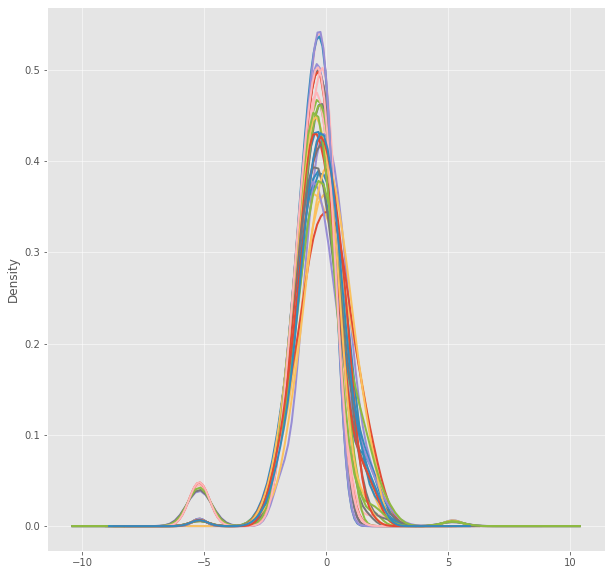

In [ ]:
from sklearn.preprocessing import QuantileTransformer

transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X))
transformed[Y == 0].plot.kde(ind=100, legend=False)


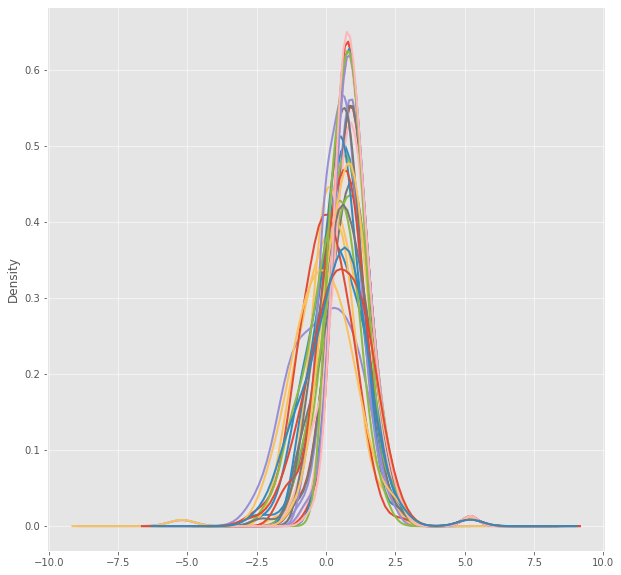

In [ ]:
transformed[Y == 1].plot.kde(ind=100, legend=False)


In [ ]:
dataSplits = []
dataStuff = train_test_split( X, Y, test_size=0.2)
dataSplits.append(dataStuff)
X_train, X_vlad, Y_train, Y_vlad = dataStuff

nb = GaussianNB()
nb.fit(X_train,Y_train)
predict = nb.predict(X_vlad)

sc = accuracy_score(Y_vlad, predict)
F1 = f1_score(Y_vlad,predict)
AUC = roc_auc_score(Y_vlad,predict)
print(sc)
print(F1)
print(AUC)

0.9473684210526315
0.9387755102040817
0.9488636363636366


In [ ]:

NB = GaussianNB(var_smoothing=0.0000000000001)
NB.fit(X, Y)
#predict = NB.predict(X_vlad)
#f1_score(Y_vlad,predict)
F1 = cross_val_score(NB, X, Y, cv=3, scoring='f1').mean()
print(F1)

0.9036576949620428


In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
T1 = pd.read_csv('test.csv').drop(columns=['id'])


In [ ]:
NB = GaussianNB(var_smoothing=0.0000000000001)
NB.fit(X, Y)
predict = NB.predict(T1)
final = pd.read_csv('test.csv')
final_data = pd.DataFrame({'id':final.id,'diagnosis':predict})
final_data.to_csv('Final_submit.csv',index=False)

In [ ]:
files.download("Final_submit.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>